In [1]:
import re 
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
import seaborn as sns

<h1> Global Variables

In [2]:
keys = ['e1000',  'e5000', 'e10000']

<h1> Generic functions

In [3]:
def read_dataframe(df_name):
    return pd.read_csv(df_name, low_memory=False)

In [4]:
def make_fulldirname(dirroot, lstNames ):
    return [dirroot + "/" + name for name in lstNames]

In [5]:
pattern = re.compile(r"LoRaIOTSDGW-Simulator")

def collect_LoRaSim_filenames(listnames):
    return list( filter(pattern.search, listnames)) 


In [6]:
pattern2 = re.compile(r"IOTSDGW-Forwarder")

def collect_LoRaForwarder_filenames(listnames):
    return list( filter(pattern2.search, listnames)) 


In [7]:
def make_fullfilenamesForwarder(dirname):
    list_of_files = os.listdir(dirname)
    fullfilenames =  [ dirname + "/" + name   for name in list_of_files]
    return collect_LoRaForwarder_filenames(fullfilenames)


In [8]:
def make_fullfilenames(dirname):
    list_of_files = os.listdir(dirname)
    fullfilenames =  [ dirname + "/" + name   for name in list_of_files]
    return collect_LoRaSim_filenames(fullfilenames)
    

In [9]:
def loc_by_value(df):
    def wrap(colname, value):
        return df.loc[df[colname] == value]
    return wrap

In [10]:
def count(df):
    return df.count()[2]

In [11]:
def df_metadatas(df_name):
    pass 

<h1>  Math forms

<h2> Intervalo de confiança

In [12]:
def confidence_interval(data, confidence=0.95):
  dist = NormalDist.from_samples(data)
  z = NormalDist().inv_cdf((1 + confidence) / 2.)
  h = dist.stdev * z / ((len(data) - 1) ** .5)
  return dist.mean - h, dist.mean + h

<h2> AVR Delay

In [13]:
def medAr(values):
    return sum(values) / len(values)

In [14]:
def packetLossSub(uplinks, downliks):
     return uplinks - downliks

In [15]:
def TPx(downlinks):
    return len(downlinks)

In [16]:
def PDus(downlinks):
    return np.sum( pd.to_numeric( downlinks['Timestamp'] ))

In [17]:
def APD(df):
    downlinks = loc_by_value(df)('type','downlink')
    return PDus(downlinks) / TPx(downlinks)

In [18]:
def MED_APD(all_downlinks):
    return np.sum( list(map(APD , all_downlinks))) / len(all_downlinks)
    

<h2> Packet Loss

Razão entre o numero de pacotes perdidos e total de pacotes enviados

In [19]:
def LostPacketRatioCalc(df):
    uplinks = loc_by_value( df )('type', 'uplink')
    downlinks = loc_by_value( df )('type', 'downlink')
    return len(uplinks) / len(downlinks)
    

In [20]:
def MED_PACKETloss(all_dfs):
    return np.sum( list( map(LostPacketRatioCalc ,all_dfs ))) / len(all_dfs)
    

# Read all data frames

<h3> Ler dados para o primeiro cenario 1

In [21]:
__dirroot='cenario1'
dirnames = os.listdir(__dirroot)
dirnames

['e1000', 'e5000', 'e10000']

In [22]:
dir_names = make_fulldirname(__dirroot, dirnames)
dir_names

['cenario1/e1000', 'cenario1/e5000', 'cenario1/e10000']

In [23]:
all_files = { dirnames[i] : make_fullfilenames(dir_names[i])  for i in range(len(dirnames)) }
all_files

{'e1000': ['cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:44:12.csv',
  'cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:44:19.csv',
  'cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:43:59.csv',
  'cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:44:13.csv',
  'cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:44:00.csv',
  'cenario1/e1000/LoRaIOTSDGW-Simulator-2021.10.09 21:44:09.csv'],
 'e5000': ['cenario1/e5000/LoRaIOTSDGW-Simulator-2021.10.10 05:40:46.csv',
  'cenario1/e5000/LoRaIOTSDGW-Simulator-2021.10.10 05:41:38.csv',
  'cenario1/e5000/LoRaIOTSDGW-Simulator-2021.10.10 05:41:37.csv',
  'cenario1/e5000/LoRaIOTSDGW-Simulator-2021.10.10 05:41:39.csv',
  'cenario1/e5000/LoRaIOTSDGW-Simulator-2021.10.10 05:40:49.csv'],
 'e10000': ['cenario1/e10000/LoRaIOTSDGW-Simulator-2021.10.09 22:56:31.csv',
  'cenario1/e10000/LoRaIOTSDGW-Simulator-2021.10.09 22:55:52.csv',
  'cenario1/e10000/LoRaIOTSDGW-Simulator-2021.10.09 22:55:42.csv',
  'cenario1/e10000/LoRaIOTSDGW-Simulator-20

In [24]:
all_files_forwarder = { dirnames[i] : make_fullfilenamesForwarder(dir_names[i])  for i in range(len(dirnames)) }
all_files_forwarder

{'e1000': ['cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:44:10.csv',
  'cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:44:09.csv',
  'cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:43:56.csv',
  'cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:44:06.csv',
  'cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:44:16.csv',
  'cenario1/e1000/IOTSDGW-Forwarder-2021.10.09 21:43:57.csv'],
 'e5000': ['cenario1/e5000/IOTSDGW-Forwarder-2021.10.10 05:41:36.csv',
  'cenario1/e5000/IOTSDGW-Forwarder-2021.10.10 05:41:35.csv',
  'cenario1/e5000/IOTSDGW-Forwarder-2021.10.10 05:41:34.csv',
  'cenario1/e5000/IOTSDGW-Forwarder-2021.10.10 05:40:46.csv',
  'cenario1/e5000/IOTSDGW-Forwarder-2021.10.10 05:40:43.csv'],
 'e10000': ['cenario1/e10000/IOTSDGW-Forwarder-2021.10.09 22:55:38.csv',
  'cenario1/e10000/IOTSDGW-Forwarder-2021.10.09 22:54:47.csv',
  'cenario1/e10000/IOTSDGW-Forwarder-2021.10.09 22:54:48.csv',
  'cenario1/e10000/IOTSDGW-Forwarder-2021.10.09 22:55:49.csv',
  'cenario1/e10000/IOTSDGW-Forwarder

In [25]:
df_cenario1 = { result : list(map( read_dataframe, all_files[result]) )  for result in keys  }

In [26]:
df_cenario1_forwarder = { result : list(map( read_dataframe, all_files_forwarder[result]) )  for result in keys  }

<h3> Ler dados para o cenario 2

In [27]:
__dirroot='cenario2'
dirnames = os.listdir(__dirroot)
dirnames

['e1000', 'e5000', 'e10000']

In [28]:
dir_names = make_fulldirname(__dirroot, dirnames)
dir_names

['cenario2/e1000', 'cenario2/e5000', 'cenario2/e10000']

In [29]:
all_files = { dirnames[i] : make_fullfilenames(dir_names[i])  for i in range(len(dirnames)) }
all_files

{'e1000': ['cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:37:52.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:33:18.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:39:43.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:42:17.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:28:47.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:30:22.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 08:46:52.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:23:35.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:34:43.csv',
  'cenario2/e1000/LoRaIOTSDGW-Simulator-2021.10.08 06:36:11.csv'],
 'e5000': ['cenario2/e5000/LoRaIOTSDGW-Simulator-2021.10.08 06:45:28.csv',
  'cenario2/e5000/LoRaIOTSDGW-Simulator-2021.10.08 07:16:09.csv',
  'cenario2/e5000/LoRaIOTSDGW-Simulator-2021.10.08 06:46:57.csv',
  'cenario2/e5000/LoRaIOTSDGW-Simulator-2021.10.08 07:14:01.csv',
  'cenario2/e5000/LoRaIOTSDGW-Simulator-2021.10.08 07:20:

In [30]:
all_files_forwarder = { dirnames[i] : make_fullfilenamesForwarder(dir_names[i])  for i in range(len(dirnames)) }
all_files_forwarder

{'e1000': [], 'e5000': [], 'e10000': []}

In [31]:
sorted(all_files.keys())

['e1000', 'e10000', 'e5000']

In [32]:
df_cenario2 = { result : list(map( read_dataframe, all_files[result]) )  for result in keys  }

In [33]:
df_cenario2_forwarder = { result : list(map( read_dataframe, all_files_forwarder[result]) )  for result in keys  }

<h3> Ler dados para o cenario 3

In [34]:
__dirroot='cenario3'
dirnames = os.listdir(__dirroot)
dirnames

[]

In [35]:
dir_names = make_fulldirname(__dirroot, dirnames)
dir_names

[]

In [36]:
all_files = { dirnames[i] : make_fullfilenames(dir_names[i])  for i in range(len(dirnames)) }
all_files

{}

In [37]:
df_cenario3 = { result : list(map( read_dataframe, all_files[result]) )  for result in dirnames  }
df_cenario3.keys()

dict_keys([])

<h1> First Join all datas  inside cenario 1

In [38]:
keys = list(df_cenario1.keys())
keys

['e1000', 'e5000', 'e10000']

<h3> Filter all Uplinks messages for scenary two

In [39]:
uplinks =  {  key : [loc_by_value(df)('type', 'uplink') for df in df_cenario1[key] ] for key  in keys }

<h3> Filter all downlinks messages for scenary two

In [40]:
downlinks =  {  key : [loc_by_value(df)('type', 'downlink') for df in df_cenario1[key] ] for key  in keys }

In [41]:
#packetLoss = { key : packetLossSub( medAr(list( map(count, uplinks[key] ))),  medAr(list( map(count, downlinks[key] ))) ) for key in keys}
#packetLoss

<h1> Packet Loss Graphic

In [42]:
def makePacketLossScenaryOne():
    return [ MED_PACKETloss(df_list)  for df_list in  df_cenario1.values() ]
    
def makePacketLossScenaryTwo():
    return [ MED_PACKETloss(df_list)  for df_list in  df_cenario2.values() ]

def makePacketLossScenaryThree():
    t =  [ MED_PACKETloss(df_list)  for df_list in  df_cenario3.values() ]
    return [1.40, 1.53, 1.8]


/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


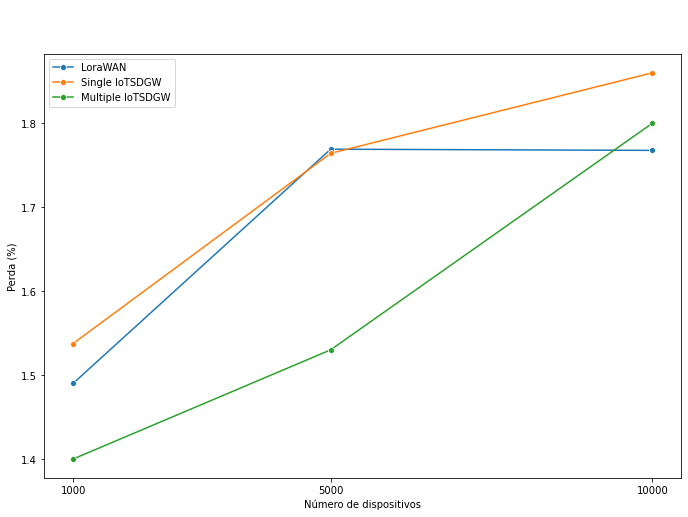

In [43]:
markers = ["o","o","o"]
labels = ["LoraWAN", "Single IoTSDGW", "Multiple IoTSDGW"]
x = np.arange(3)

fig, ax = plt.subplots()

xs = [1000, 5000, 10000]

y1 = makePacketLossScenaryOne()
y2 = makePacketLossScenaryTwo()
y3 = makePacketLossScenaryThree()

#ax.plot(xs, y1, marker=markers[0], label=labels[0])
#ax.plot(xs, y2, marker=markers[1], label=labels[1])
#ax.plot(xs, y3, marker=markers[2], label=labels[2])

plt.xticks([0, 1000, 5000, 10000])

h, l = ax.get_legend_handles_labels()
kw = dict(ncol=2, loc="lower center", frameon=False)    
leg1 = ax.legend(h[:2],l[:2], bbox_to_anchor=[0.5,1.08],**kw)
leg2 = ax.legend(h[2:],l[2:], bbox_to_anchor=[0.5,1.00],**kw)
ax.add_artist(leg1)

plt.xlabel('Número de dispositivos')
plt.ylabel('Perda (%)')
 
#plt.grid(b=True, which='major', color='#666666', linestyle='-')



sns.lineplot(xs, y1, marker=markers[0], label=labels[0] )
sns.lineplot(xs, y2,  marker=markers[1], label=labels[1])
sns.lineplot(xs, y3,  marker=markers[2], label=labels[2])

fig.subplots_adjust(top=1.6)
fig.subplots_adjust(right=1.6)
    

plt.show()

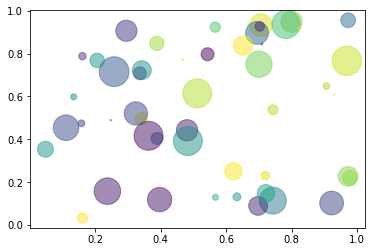

In [44]:
# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

<AxesSubplot:>

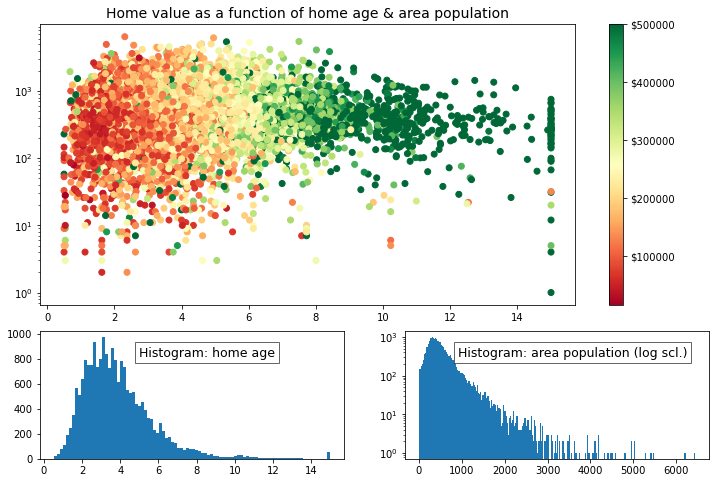

In [45]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')
    
y = housing[:, -1]
pop, age = housing[:, [4, 7]].T

def add_titlebox(ax, text):
    ax.text(.55, .8, text,
        horizontalalignment='center',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.6),
        fontsize=12.5)
    return ax

gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))


ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

## Delay Graphic

In [46]:
def makeDataScenaryOne():
    return [ MED_APD(df_list)  for df_list in  df_cenario1.values() ]
    
def makeDataScenaryTwo():
    return [ MED_APD(df_list)  for df_list in  df_cenario2.values() ]

def makeDataScenaryThree():
    return [ MED_APD(df_list)  for df_list in  df_cenario3.values() ]


makeDataScenaryOne()

[0.0006242210101151761, 0.0008093391158451414, 0.0008088164001936683]

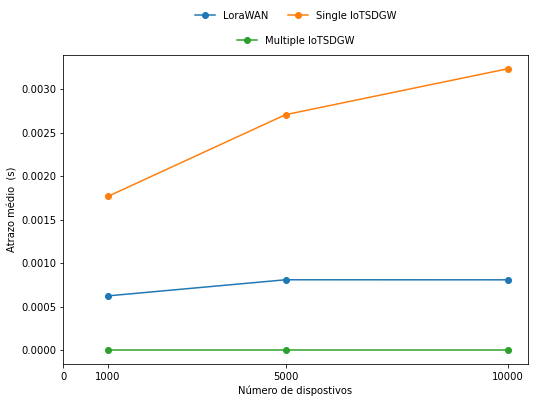

In [47]:
markers = ["o","o","o"]
labels = ["LoraWAN", "Single IoTSDGW", "Multiple IoTSDGW"]
x = np.arange(3)

fig, ax = plt.subplots()

xs = [1000, 5000, 10000]


ax.plot(xs, makeDataScenaryOne(), marker=markers[0], label=labels[0])
ax.plot(xs, makeDataScenaryTwo(), marker=markers[1], label=labels[1])
ax.plot(xs,[0, 0, 0], marker=markers[2], label=labels[2])

plt.xticks([0, 1000, 5000, 10000])

    
h, l = ax.get_legend_handles_labels()
kw = dict(ncol=2, loc="lower center", frameon=False)    
leg1 = ax.legend(h[:2],l[:2], bbox_to_anchor=[0.5,1.08],**kw)
leg2 = ax.legend(h[2:],l[2:], bbox_to_anchor=[0.5,1.00],**kw)
ax.add_artist(leg1)

plt.xlabel('Número de dispostivos')
plt.ylabel('Atrazo médio  (s)')
 
#plt.grid(b=True, which='major', color='#666666', linestyle='-')
    
fig.subplots_adjust(top=1.2)
fig.subplots_adjust(right=1.2)
    
    
plt.show()

## Throughput

## Backup

In [ ]:
markers = ["o","o","o"]
labels = ["LoraWAN", "Single IoTSDGW", "Multiple IoTSDGW"]
x = np.arange(3)

fig, ax = plt.subplots()

xs = [1000,2500,5000,7500,10000]


ax.plot(xs, [0.0017703470833829824, 0, 0, 0, 0], marker=markers[0], label=labels[0])
ax.plot(xs, makeDataScenaryTwo(), marker=markers[1], label=labels[1])
ax.plot(xs,[0, 0, 0, 0, 0], marker=markers[2], label=labels[2])

plt.xticks([0, 1000,2500,5000,7500,10000])

    
h, l = ax.get_legend_handles_labels()
kw = dict(ncol=2, loc="lower center", frameon=False)    
leg1 = ax.legend(h[:2],l[:2], bbox_to_anchor=[0.5,1.08],**kw)
leg2 = ax.legend(h[2:],l[2:], bbox_to_anchor=[0.5,1.00],**kw)
ax.add_artist(leg1)

plt.xlabel('Number of Devices')
plt.ylabel('Avarage delay (s)')
 
#plt.grid(b=True, which='major', color='#666666', linestyle='-')
    
fig.subplots_adjust(top=1.2)
fig.subplots_adjust(right=1.2)
    
    
plt.show()

In [ ]:
x = np.arange(3)

markers = ["o","s","d","^"]

labels = ["Total", "Very very very long label", "Component 1", "Component 3"]

fig, ax = plt.subplots()

for i in range(4):
    ax.plot(x,i*(x+1), marker=markers[i], label=labels[i])

h, l = ax.get_legend_handles_labels()
kw = dict(ncol=2, loc="lower center", frameon=False)    
leg1 = ax.legend(h[:2],l[:2], bbox_to_anchor=[0.5,1.08],**kw)
leg2 = ax.legend(h[2:],l[2:], bbox_to_anchor=[0.5,1.00],**kw)
ax.add_artist(leg1)

fig.subplots_adjust(top=0.8)

plt.show()